<a href="https://colab.research.google.com/github/Kristina140699/DataScienceProjects/blob/main/Foundational/Project2_CabFarePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import itertools
import gc
import os
import sys

In [3]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
               # if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                 #   df[col] = df[col].astype(np.float16)
               # el
              if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
              else:
                    df[col] = df[col].astype(np.float64)
        #else:
          #  df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [1]:
#For taking the dataset from G-drive
from google.colab import drive #mounting my G-drive to G-colab
drive.mount('/content/drive')

#For taking the dataset from device
#from google.colab import files
#uploaded = files.upload()


Mounted at /content/drive


In [4]:
#Reading the data from the G-drive and directly assigning it to a pandas data frame
wd=pd.read_csv("/content/drive/MyDrive/Learning..../Python/Project Final Copy/weather.csv")
wd = reduce_mem_usage(wd)

#import io
#wd = pd.read_csv(io.BytesIO(uploaded['weather.csv']))
#This stores the Dataset in a Pandas Dataframe    

Memory usage of dataframe is 0.38 MB
Memory usage after optimization is: 0.22 MB
Decreased by 43.7%


In [ ]:
#Since the G-drive is laready mounted so no need to mount it again for the next dataset
#But in case of uploading the dataset from device the following code needs to be run

#from google.colab import files
#uploaded = files.upload()

In [5]:
car= pd.read_csv("/content/drive/MyDrive/Learning..../Python/Project Final Copy/cab_rides.csv")
car = reduce_mem_usage(car)
#import io
#car = pd.read_csv(io.BytesIO(uploaded['cab_rides.csv']))
#This stores the Dataset in a Pandas Dataframe


Memory usage of dataframe is 52.88 MB
Memory usage after optimization is: 42.30 MB
Decreased by 20.0%


In [6]:
car.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [ ]:
car.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [ ]:
wd.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [ ]:
import datetime
car["datetime"] = pd.to_datetime(car["time_stamp"])
car["datetime"]

0        1970-01-01 00:25:44.949989376
1        1970-01-01 00:25:43.280001024
2        1970-01-01 00:25:43.370047488
3        1970-01-01 00:25:43.550009344
4        1970-01-01 00:25:43.459962880
                      ...             
693066   1970-01-01 00:25:43.710048256
693067   1970-01-01 00:25:43.710048256
693068   1970-01-01 00:25:43.710048256
693069   1970-01-01 00:25:43.710048256
693070   1970-01-01 00:25:43.710048256
Name: datetime, Length: 693071, dtype: datetime64[ns]

In [ ]:
wd["date_time"] = pd.to_datetime(wd["time_stamp"])
wd["date_time"]

0      1970-01-01 00:00:01.545003901
1      1970-01-01 00:00:01.545003901
2      1970-01-01 00:00:01.545003901
3      1970-01-01 00:00:01.545003901
4      1970-01-01 00:00:01.545003901
                    ...             
6271   1970-01-01 00:00:01.543819974
6272   1970-01-01 00:00:01.543819974
6273   1970-01-01 00:00:01.543819974
6274   1970-01-01 00:00:01.543819974
6275   1970-01-01 00:00:01.543819974
Name: date_time, Length: 6276, dtype: datetime64[ns]

In [ ]:
car.shape

(693071, 11)

In [ ]:
wd.shape

(6276, 9)

In [ ]:
car.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.190057,1.530152e+12,16.543797,1.013870
std,1.138935,1.390676e+10,9.319172,0.091467
min,0.020000,1.543200e+12,2.500000,1.000000
25%,1.280000,1.543440e+12,9.000000,1.000000
50%,2.160000,1.543740e+12,13.500000,1.000000
75%,2.920000,1.544830e+12,22.500000,1.000000
max,7.860000,1.545160e+12,97.500000,3.000000


In [ ]:
wd.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090378,0.677775,1008.443176,0.057652,1.543857e+09,0.763976,6.802810
std,6.022061,0.314283,12.870790,0.100758,6.659340e+05,0.127340,3.633476
min,19.620001,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077501,0.440000,997.747498,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130001,0.780000,1007.659973,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832501,0.970000,1018.479980,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.119995,0.780700,1.545159e+09,0.990000,18.180000


In [ ]:
a = pd.concat([car,wd]) #concatnating data of both the tables

In [ ]:
a.head(10) #displays the first 10 rows of the new dataframe

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.949989376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.280001024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.370047488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.550009344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.459962880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
5,0.44,Lyft,1.545070e+12,North Station,Haymarket Square,16.5,1.0,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lux Black,1970-01-01 00:25:45.070051328,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
6,1.08,Lyft,1.543210e+12,Northeastern University,Back Bay,10.5,1.0,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft XL,1970-01-01 00:25:43.210008576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
7,1.08,Lyft,1.543780e+12,Northeastern University,Back Bay,16.5,1.0,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lux Black,1970-01-01 00:25:43.780040704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
8,1.08,Lyft,1.543820e+12,Northeastern University,Back Bay,3.0,1.0,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Shared,1970-01-01 00:25:43.820017664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
9,1.08,Lyft,1.543320e+12,Northeastern University,Back Bay,27.5,1.0,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.319977984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
a["day"] = a.date_time.dt.day
a["hour"] = a.date_time.dt.hour

In [ ]:
a.tail() #gives us the last 5 rows

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
6271,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.720001,North Station,0.89,1000.690002,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,1.0,0.0
6272,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.849998,Northeastern University,0.88,1000.710022,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6273,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.820000,South Station,0.89,1000.700012,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6274,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.779999,Theatre District,0.89,1000.700012,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6275,NaN,NaN,1.543820e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.689999,West End,0.89,1000.700012,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,1.0,0.0


In [ ]:
a.fillna(0, inplace= True)

In [ ]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.44,Lyft,1.544950e+12,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.949989376,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,0.44,Lyft,1.543280e+12,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.280001024,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,0.44,Lyft,1.543370e+12,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.370047488,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0.44,Lyft,1.543550e+12,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.550009344,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,0.44,Lyft,1.543460e+12,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.459962880,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [ ]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [ ]:
a.groupby("cab_type").count()

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


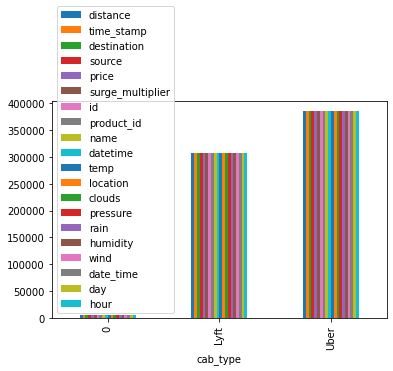

In [ ]:
a.groupby("cab_type").count().plot.bar()

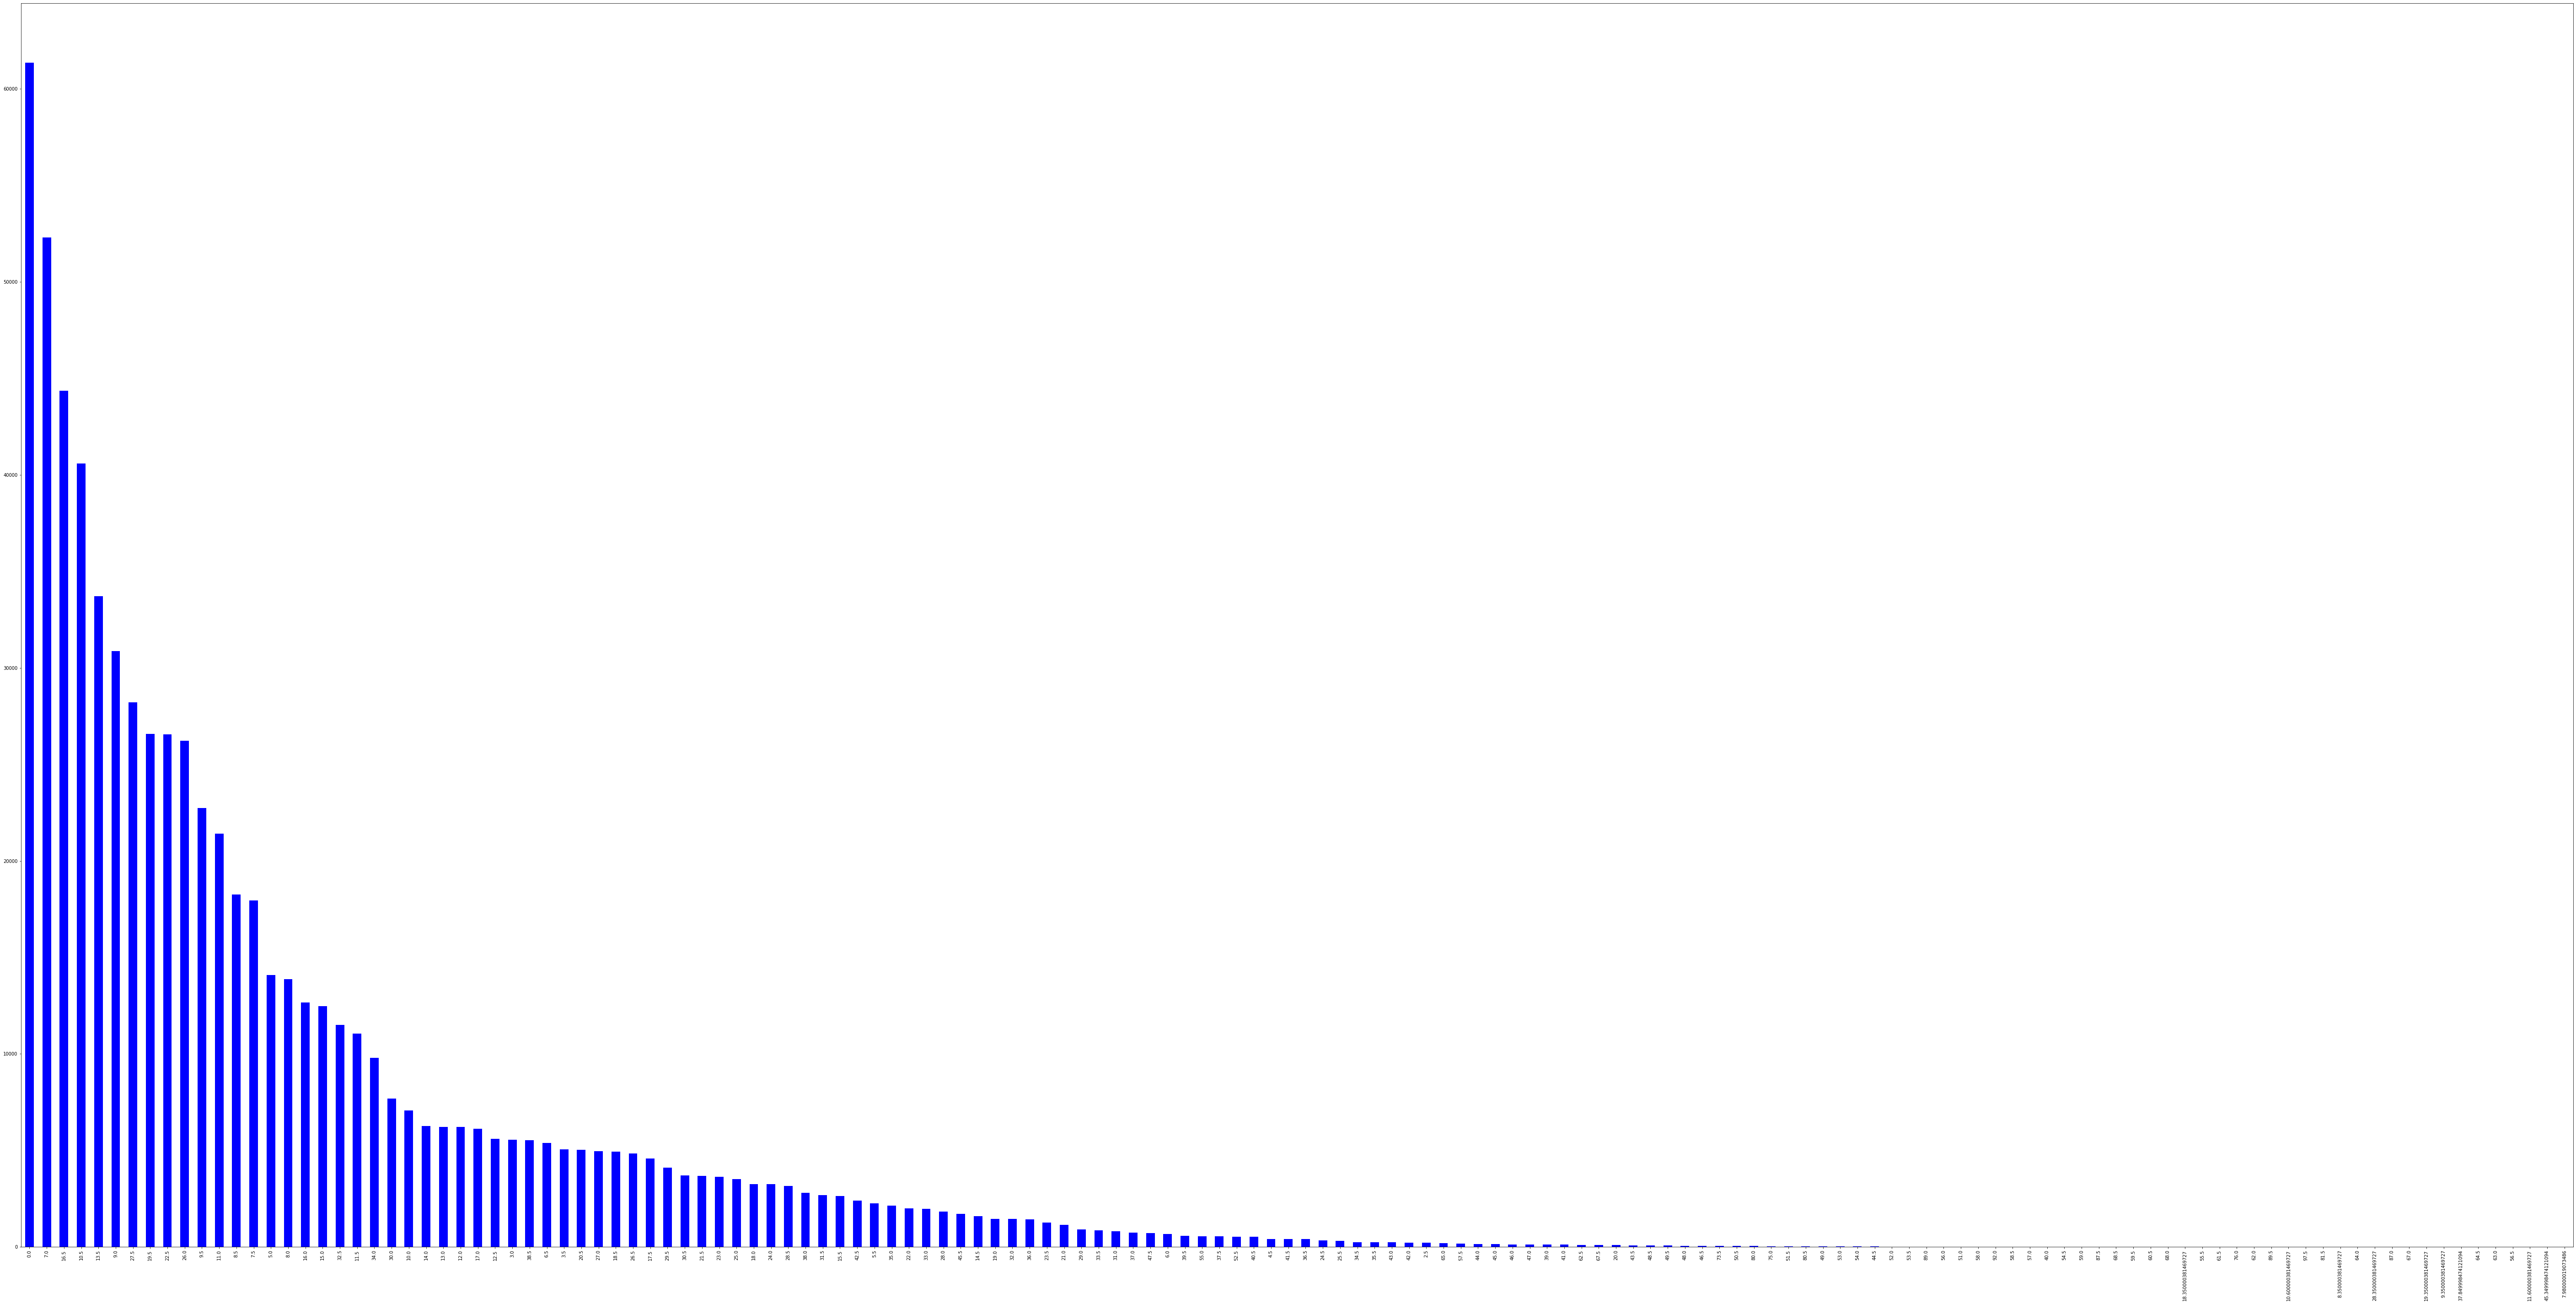

In [ ]:
a["price"].value_counts().plot(kind="bar", figsize=(100,50), color="b")

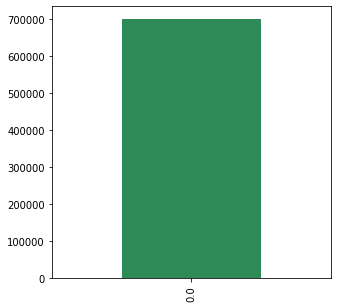

In [ ]:
#displaying the peak hour
a["hour"].value_counts().plot(kind="bar", figsize=(5,5), color="seagreen")

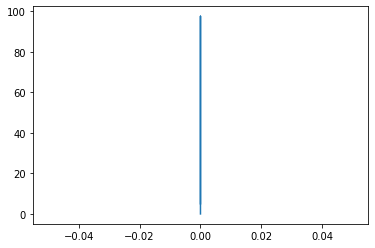

In [ ]:
import matplotlib.pyplot as plt
x = a["hour"]
y = a["price"]
plt.plot(x,y)
plt.show()

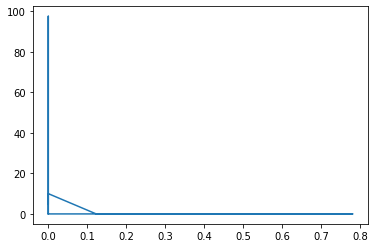

In [ ]:
x = a["rain"]
y = a["price"]
plt.plot(x,y)
plt.show()

In [ ]:
#training data
x1 = a[["distance","temp", "pressure", "clouds", "humidity", "wind", "rain", "day", "hour", "surge_multiplier"]]
y1 = a["price"]

In [ ]:
#Using SKicit-learn to split data into traing and testing sets 
from sklearn.model_selection import train_test_split 
#Split the data into training and testing sets 
x_train, y_train, x_test, y_test = train_test_split(x1, y1, test_size = 0.25, random_state =42)

In [ ]:
linear= LinearRegression()
linear.fit(x_train, x_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = linear.predict(y_train)
predictions

array([32.5479163 , 14.7556079 , 16.81696887, ..., 11.82898386,
       11.85443274, 13.22867338])

In [ ]:
#displaying the actual and predicted values
df = pd.DataFrame({"Actual Values": y_test, "Predicted Values": predictions})
df

,Actual Values,Predicted Values
81607,42.5,32.547916
354,0.0,14.755608
471801,32.5,16.816969
407645,27.5,10.480192
474760,27.5,10.556539
...,...,...
538489,7.5,10.709232
579511,13.5,15.519075
5421,9.0,11.828984
279982,8.0,11.854433


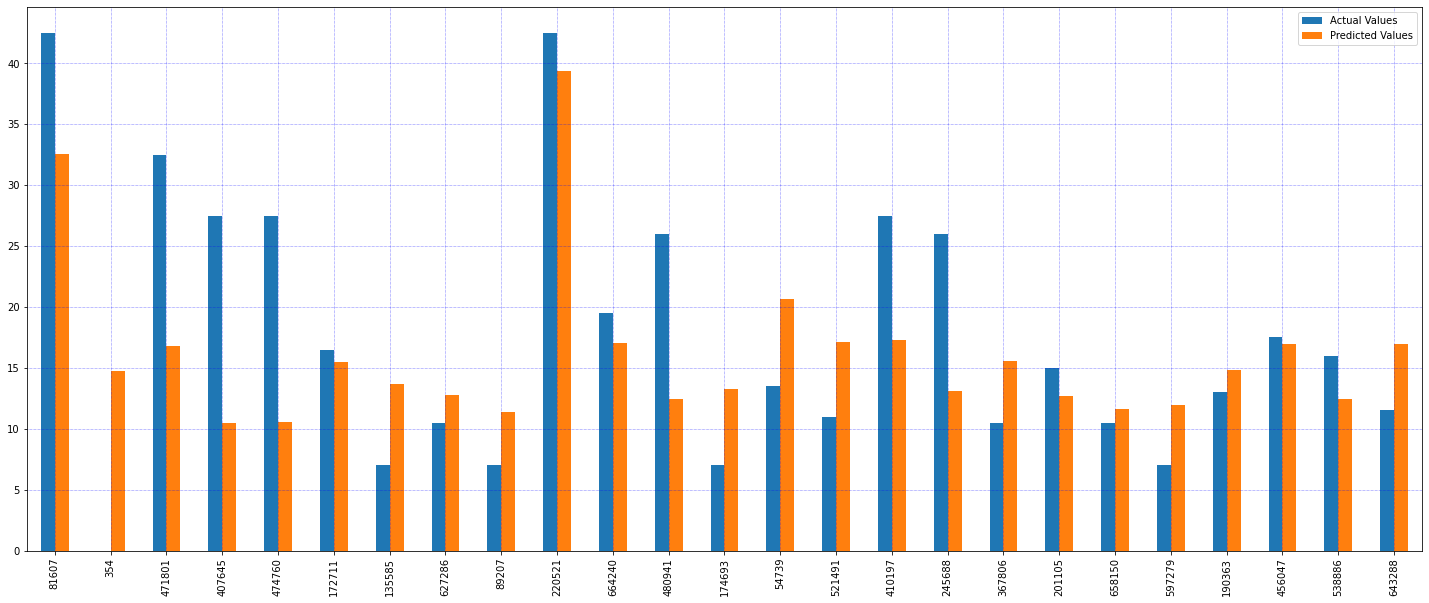

In [ ]:
df1 = df.head(25)
df1.plot(kind= "bar", figsize=(25,10))
plt.grid(which="major", linestyle=":", linewidth="0.5", color="blue")
plt.grid(which="minor", linestyle="-", linewidth="0.5", color="pink")
plt.show()